# Prepare AI Ready Data

## Import Packages
(and set filepaths)

In [1]:
# set filepath
path_to_cleaned = '../data/cleaned/'

# import packages - general
import numpy as np
import pandas as pd

# import packages - geospatial
import xarray as xr

# import packages - plotting
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

## Read in data

In [2]:
ds = xr.open_dataset(path_to_cleaned+'era5.nc')

## Check Units and metadata

In [16]:
print('Units on SST field of ERA5 data:', ds.sst.units)
print('Units on MSLP field of ERA5 data:', ds.msl.units)
print('Units on Surface Pressure field of ERA5 data:', ds.sp.units)

Units on SST field of ERA5 data: K
Units on MSLP field of ERA5 data: Pa
Units on Surface Pressure field of ERA5 data: Pa
Units on 500hPa Height of ERA5 data: m**2 s**-2


## Filter for desired time period and spatial region

To start, I'll go with a north pacific reigon and 1970-2023. However, I'll make this flexible, so that I can add additional datasets as I want to expplore in this project



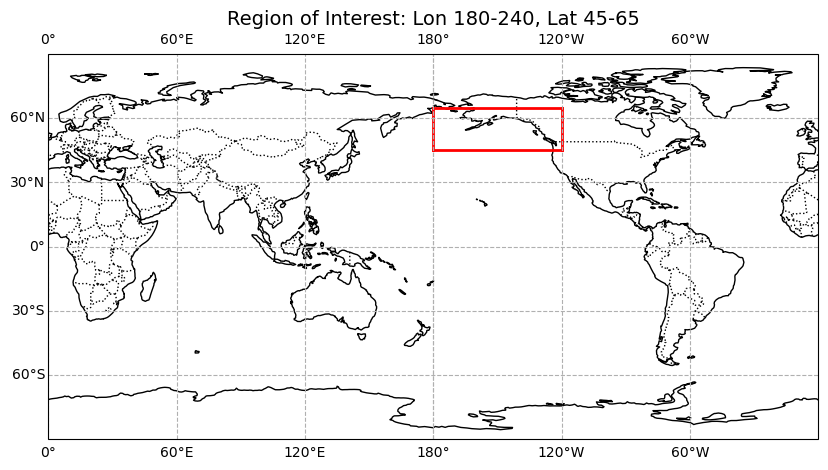

In [3]:
# Set desired reigon and time periods (can list as many as we want)
coords = [[180,240,45,65]]
times = [['1970-01-01','1970-01-01']]

for c in coords:

    fig, ax = plt.subplots(figsize=(10, 5), subplot_kw={'projection': ccrs.PlateCarree(central_longitude=180)})
    ax.add_feature(cfeature.COASTLINE)
    ax.add_feature(cfeature.BORDERS, linestyle=':')
    ax.set_extent([0, 360, -90, 90], crs=ccrs.PlateCarree())

    # Add a red box for the specified region
    ax.plot([c[0], c[1]], [c[2], c[2]], color='red', linewidth=2, transform=ccrs.PlateCarree())
    ax.plot([c[0], c[1]], [c[3], c[3]], color='red', linewidth=2, transform=ccrs.PlateCarree())
    ax.plot([c[0], c[0]], [c[2], c[3]], color='red', linewidth=2, transform=ccrs.PlateCarree())
    ax.plot([c[1], c[1]], [c[2], c[3]], color='red', linewidth=2, transform=ccrs.PlateCarree())

    # add lat/lon gridlines
    gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, linestyle='--')

    ax.set_title(f'Region of Interest: Lon {c[0]}-{c[1]}, Lat {c[2]}-{c[3]}', fontsize=14)

    plt.show()


In [10]:
# apply the reigon filter to the datasets
variables = ['sst', 'msl', 'sp']

coords = [[180,240,45,65]]
times = [['1970-01-01','2023-12-31']]  # Ensure the time range is valid

for c in coords:
    for t in times:
        ds_subset = xr.Dataset()
        for v in variables:
            ds_subset[v] = ds[v].sel(latitude=slice(c[3], c[2]), longitude=slice(c[0], c[1]), time=slice(t[0], t[1]))

        # save the subsetted dataset
        filename = f"era5_subset_{c[0]}-{c[1]}_{c[2]}-{c[3]}_{t[0][:4]}_{t[1][:4]}.nc"
        ds_subset.to_netcdf('../data/ai_ready/'+filename)

In [12]:
ds_subset

<xarray.Dataset>
Dimensions:    (longitude: 241, latitude: 81, time: 648)
Coordinates:
  * longitude  (longitude) float32 180.0 180.2 180.5 180.8 ... 239.5 239.8 240.0
  * latitude   (latitude) float32 65.0 64.75 64.5 64.25 ... 45.5 45.25 45.0
  * time       (time) datetime64[ns] 1970-01-01 1970-02-01 ... 2023-12-01
Data variables:
    sst        (time, latitude, longitude) float32 ...
    msl        (time, latitude, longitude) float32 ...
    sp         (time, latitude, longitude) float32 ...
    z          (time, latitude, longitude) float32 ...